<a href="https://colab.research.google.com/github/kushum-coder/2501460_kushum/blob/main/2501460_KushumRana_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Drilling Failures Using Machine Learning


## Mount Google Drive

The dataset is stored in Google Drive, so we mount the drive to access the files in Colab.


## Dataset Description

Dataset: Explainable AI (XAI) Drilling Dataset (Kaggle)

- Target Variable: **Main Failure (0 = No Failure, 1 = Failure)**
- Contains operational drilling parameters
- Used for predictive maintenance in manufacturing
- Aligns with **UN SDG 9: Industry, Innovation, and Infrastructure**


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load Classification Dataset

We load the drilling dataset from Google Drive and inspect its shape and first few rows.


In [8]:
cls_path = "/content/drive/MyDrive/Classification Dataset/XAI_Drilling_Dataset.csv"

df_cls = pd.read_csv(cls_path)

print("Dataset Shape:", df_cls.shape)
df_cls.head()


Dataset Shape: (20000, 15)


,ID,Cutting speed vc [m/min],Spindle speed n [1/min],Feed f [mm/rev],Feed rate vf [mm/min],Power Pc [kW],Cooling [%],Material,Drill Bit Type,Process Time [sec],Main Failure,BEF,CCF,FWF,WDF
0,1,29.92,794,0.218,173,194.87,75,N,W,19.26,0,0,0,0,0
1,2,29.85,792,0.241,191,214.71,75,N,W,19.55,0,0,0,0,0
2,3,22.85,606,0.183,111,95.68,50,P,N,36.16,0,0,0,0,0
3,4,29.60,785,0.236,237,206.93,75,N,W,21.22,1,0,0,1,0
4,5,17.43,462,0.246,114,74.85,50,K,H,33.56,0,0,0,0,0


## Exploratory Data Analysis (EDA)


In [ ]:
# Dataset info
df_cls.info()

# Missing values
print("\nMissing Values in Each Column:\n")
print(df_cls.isnull().sum())

# Summary statistics
df_cls.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  int64  
 1   Cutting speed vc [m/min]  20000 non-null  float64
 2   Spindle speed n [1/min]   20000 non-null  int64  
 3   Feed f [mm/rev]           20000 non-null  float64
 4   Feed rate vf [mm/min]     20000 non-null  int64  
 5   Power Pc [kW]             20000 non-null  float64
 6   Cooling [%]               20000 non-null  int64  
 7   Material                  20000 non-null  object 
 8   Drill Bit Type            20000 non-null  object 
 9   Process Time [sec]        20000 non-null  float64
 10  Main Failure              20000 non-null  int64  
 11  BEF                       20000 non-null  int64  
 12  CCF                       20000 non-null  int64  
 13  FWF                       20000 non-null  int64  
 14  WDF   

,ID,Cutting speed vc [m/min],Spindle speed n [1/min],Feed f [mm/rev],Feed rate vf [mm/min],Power Pc [kW],Cooling [%],Process Time [sec],Main Failure,BEF,CCF,FWF,WDF
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,23.322470,618.644400,0.224831,140.629850,128.992781,56.750000,29.242184,0.050050,0.010750,0.017200,0.013900,0.015000
std,5773.647028,5.174178,137.248701,0.037563,41.470466,65.403239,23.941933,6.866544,0.218054,0.103126,0.130019,0.117079,0.121555
min,1.000000,16.330000,433.000000,0.108000,62.000000,49.040000,0.000000,15.970000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,17.590000,467.000000,0.193000,109.000000,78.510000,50.000000,20.360000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,22.610000,600.000000,0.233000,122.000000,93.250000,50.000000,32.960000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.250000,29.780000,790.000000,0.254000,183.000000,203.600000,75.000000,34.530000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20000.000000,31.070000,824.000000,0.321000,261.000000,305.220000,100.000000,38.570000,1.000000,1.000000,1.000000,1.000000,1.000000


## Target Variable and Class Distribution

The target variable is **Main Failure**, which is highly imbalanced.


In [9]:
target = "Main Failure"

print("Class Distribution:\n")
print(df_cls[target].value_counts())


Class Distribution:

Main Failure
0    18999
1     1001
Name: count, dtype: int64


## Data Visualization

We visualize the class distribution and feature correlations.


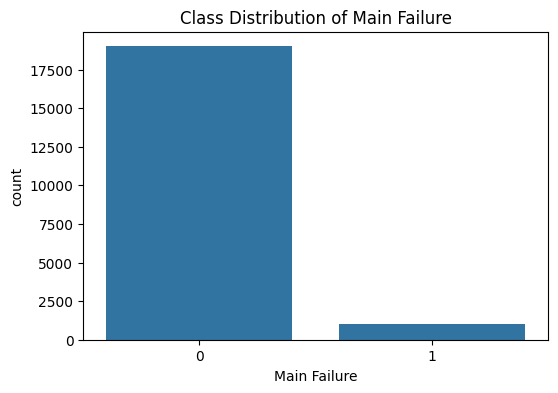

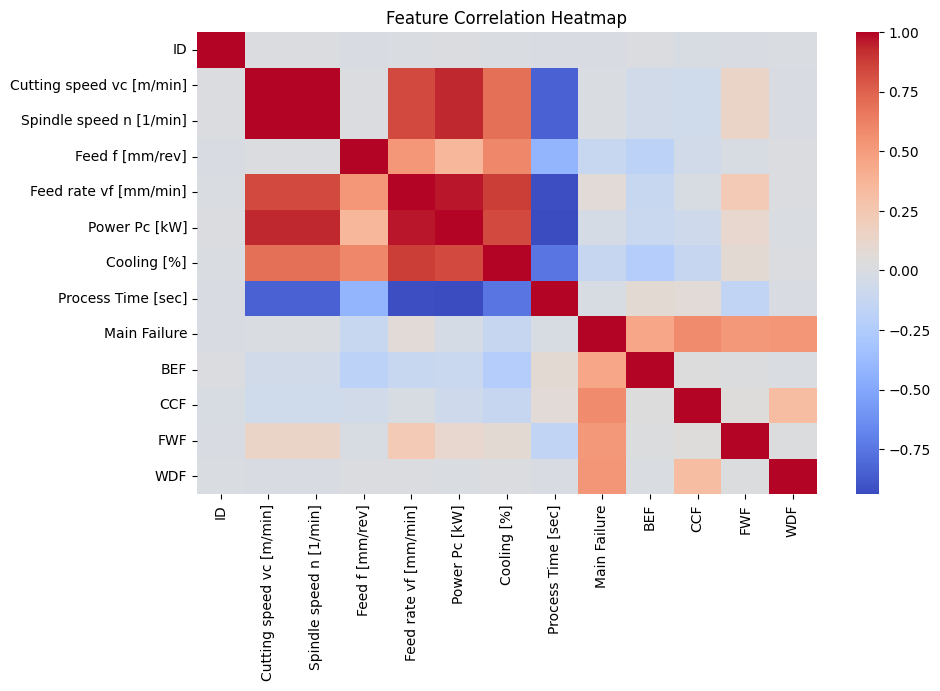

In [ ]:
# Class distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x=df_cls[target])
plt.title("Class Distribution of Main Failure")
plt.show()

# Correlation heatmap (numeric features only)
plt.figure(figsize=(10,6))
sns.heatmap(df_cls.corr(numeric_only=True), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## Convert Categorical Variables to Numeric

We apply One-Hot Encoding to convert text features into numerical format.


In [ ]:
# Convert text columns to numeric using One-Hot Encoding
df_cls = pd.get_dummies(df_cls,
                        columns=["Material", "Drill Bit Type"],
                        drop_first=True)

print("New shape after encoding:", df_cls.shape)


New shape after encoding: (20000, 17)


## Train-Test Split and Feature Scaling

We split the dataset into training and testing sets and standardize the features.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_cls.drop(columns=[target, "ID"])  # Remove ID as it's not useful
y = df_cls[target]

# Train-test split (stratified because data is imbalanced)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (16000, 15)
Testing shape: (4000, 15)


## Model 1: Neural Network (MLP Classifier)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

print("==== Neural Network Results ====")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_mlp))


==== Neural Network Results ====
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3800
           1       1.00      1.00      1.00       200

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



## Model 2: Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight="balanced")
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("==== Logistic Regression Results ====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log))


==== Logistic Regression Results ====
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3800
           1       1.00      1.00      1.00       200

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



## Model 3: Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("==== Random Forest Results ====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


==== Random Forest Results ====
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3800
           1       1.00      1.00      1.00       200

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



## Hyperparameter Tuning using GridSearchCV

We tune the Random Forest model to find the best parameters.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Hyperparameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 1.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -----------------------------
# STEP 1: Make sure encoding exists
# -----------------------------

# If not already encoded, encode again safely
if "Material" in df_cls.columns:
    df_cls = pd.get_dummies(df_cls,
                            columns=["Material", "Drill Bit Type"],
                            drop_first=True)

# -----------------------------
# STEP 2: Define X and y correctly
# -----------------------------

target = "Main Failure"

X = df_cls.drop(columns=[target, "ID"])  # remove ID and target
y = df_cls[target]

# -----------------------------
# STEP 3: Train-test split
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# STEP 4: Scale only NUMERIC data
# -----------------------------

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shapes after FIX:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


Shapes after FIX:
X_train: (16000, 15)
X_test: (4000, 15)


## Hyperparameter Tuning for Logistic Regression


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_log = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"]
}

grid_log = GridSearchCV(
    LogisticRegression(class_weight="balanced", max_iter=1000),
    param_grid_log,
    cv=5,
    n_jobs=-1
)

grid_log.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_log.best_params_)
print("Best CV Score:", grid_log.best_score_)


Best Logistic Regression Params: {'C': 0.01, 'penalty': 'l2'}
Best CV Score: 1.0


## Feature Selection using RFE

We use Recursive Feature Elimination (RFE) to select the most important 10 features.


In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(log_model, n_features_to_select=10)
selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

print("Selected Important Features:\n")
for f in selected_features:
    print("-", f)


Selected Important Features:

- Cutting speed vc [m/min]
- Spindle speed n [1/min]
- Feed f [mm/rev]
- Feed rate vf [mm/min]
- Power Pc [kW]
- Cooling [%]
- BEF
- CCF
- FWF
- WDF


## Final Optimized Random Forest Model

We train the tuned Random Forest using only the selected important features.


In [ ]:
# Use only selected features
X_selected = df_cls[selected_features]

# Split again
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Scale again
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train final optimized Random Forest
rf_final = RandomForestClassifier(**grid.best_params_,
                                   class_weight="balanced",
                                   random_state=42)

rf_final.fit(X_train, y_train)

y_pred_final = rf_final.predict(X_test)

print("==== FINAL MODEL RESULTS ====")
print("Final Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nFinal Classification Report:\n")
print(classification_report(y_test, y_pred_final))


==== FINAL MODEL RESULTS ====
Final Accuracy: 1.0

Final Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3800
           1       1.00      1.00      1.00       200

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



## Model Performance Comparison

We compare the accuracy of all three models.


In [ ]:
results = pd.DataFrame({
    "Model": [
        "MLP Neural Network",
        "Logistic Regression",
        "Random Forest (Tuned)"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_mlp),
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_final)
    ]
})

print("\nModel Comparison Table:\n")
print(results)



Model Comparison Table:

                   Model  Accuracy
0     MLP Neural Network       1.0
1    Logistic Regression       1.0
2  Random Forest (Tuned)       1.0
